In [10]:
df=pd.read_excel("E:\HTL Project\Dataset 2.xlsx")
df.head()

<IPython.core.display.Javascript object>

,C,H,N,O,S,Temp,Time,Pressure,Proteins,lipids,carbohydrates,Culture Condition,Catalyst,HHV,ERR,Yield%
0,72.7,8.8,6.3,11.5,0.6,300,30,130,53.0,7.5,11.0,open pond,Na2CO3,35.2,37.2,36.0
1,76.0,10.3,3.9,9.0,0.8,350,60,180,52.0,14.0,27.0,Flask,H-ZSM5,37.9,42.7,43.0
2,70.6,9.2,5.5,12.3,0.4,250,60,100,49.5,11.0,14.2,open pond,LiOH,33.8,33.0,33.0
3,69.1,8.4,5.0,15.2,0.5,250,30,100,45.6,12.1,NaN,PBR,NaN,34.8,41.5,24.7
4,72.0,8.8,6.2,9.9,0.3,375,50,221,34.0,23.0,21.0,NaN,Na2CO3,36.0,64.8,55.3


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [25]:
x=df.drop('ERR',axis=1)
y=df['ERR']
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#this is Testing Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
y_pred =regressor.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
#the training data
regressor2 = RandomForestRegressor(n_estimators = 100)
regressor2.fit(x_train, y_train)
y_pred1 =regressor2.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  3.2135333333333365


<IPython.core.display.Javascript object>

Root mean square error:  0.22322475111110568
R2 square:  0.7865980417546747


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  2.253024999999997


<IPython.core.display.Javascript object>

Root mean square error:  0.002644530625000727
R2 square:  0.8899096876540223


In [26]:
params = {
    'max_depth': [2,3,5,10,20],
    'n_estimators': [10,25,30,50,50,100,200]
}

In [27]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=regressor,
                           param_grid=params)

In [28]:
rf_grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'n_estimators': [10, 25, 30, 50, 50, 100, 200]})

In [29]:
rf_grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [30]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
35,24.8,24.917000
53,39.5,37.054667
84,12.3,13.893000
78,14.6,14.933000
5,41.7,35.508000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

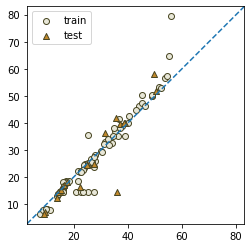

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/RF ERR 2.png', dpi=300)